In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Prática 6 -  Circuitos RLC
## Solução estacionária
Montar um circuito RLC com os seguintes componentes:

In [3]:
R = 98.7 #ohm, escala de 200 ohm
C = 108.8e-9 #F, escala de 200 nF
L = 45.3e-3 #H, escala de 200 mH
f = 1/(2*np.pi*np.sqrt(L*C))
print(f)

2267.026427915071


### Tarefa 1
Estudar as validades das Leis de Kirchoff para correntes AC
* Medir com osciloscópio; e
* com um multímetro tensão nos terminais de cada componente

In [4]:
cat data/tarefa1.dat

#frequencia: 2.0714 kHz
#mult	osci
2.45	3.7		#fonte      #escala mult/osci: 20/2
1.2	1.9		#resistor	#escala mult/osci: 20/1
4.54	6.4		#indutor    #escala mult/osci: 20/2
1.30	2.1		#capacitor  #escala mult/osci: 20/1





$\Delta t$ resistor-fonte:  -70e-6  (escala .1 ms)

$\Delta t$ indutor-fonte:    5e-6   (escala 10 microsec)

$\Delta t$ capacitor-fonte: -136e-6 (escala 20 microsec)


### Tarefa 2
Encontrar experimentalmente a frequência de ressonância e com estes dados estudar a fase entre corrente e tensão e a impedância total do sistema.
* Medir tensão na fonte
* Medir tensao no resistor
* Variar frequência


Frequência de ressonância esperada:
2267.026427915071 Hz


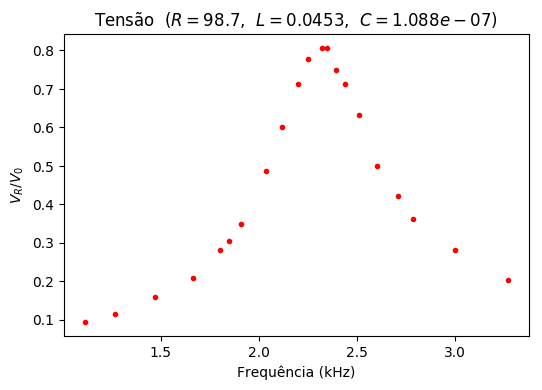


Fase esperada:
0 rad


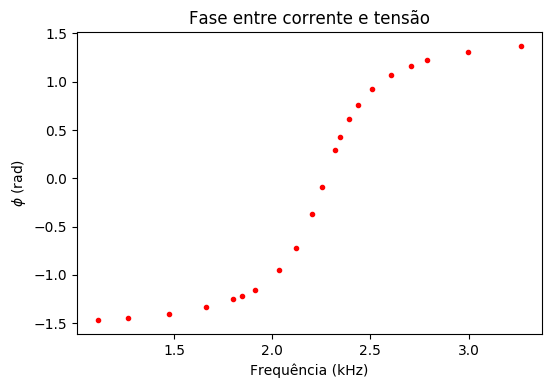

Impedância esperada:
98.7 ohm


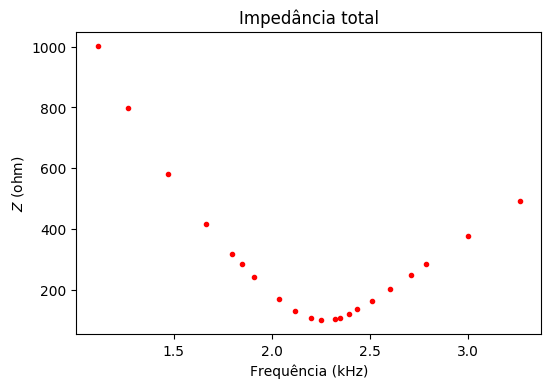

In [6]:
data2 = np.loadtxt("data/tarefa2.dat").T
freq = data2[0]*2*np.pi
escVr,quadVr = data2[1],data2[2]
escV0,quadV0 = data2[3],data2[4]
escdt,quaddt = data2[5],data2[6]
Vr = escVr*quadVr/2
V0 = escV0*quadV0/2
dt = escdt*quaddt

v = Vr/V0


print("\nFrequência de ressonância esperada:")
print(f, "Hz")
plt.figure(dpi=100)
plt.title(r"Tensão  ($R={}$,  $L={}$,  $C={}$)".format(R,L,C))
plt.xlabel("Frequência (kHz)")
plt.ylabel(r"$V_R/V_0$")
plt.plot(data2[0]*1e-3, v, '.r')
plt.show()

print("\nFase esperada:")
print("0 rad")
phi = lambda x : np.arctan((x*L - 1/(x*C))/R)
plt.figure(dpi=100)
plt.title("Fase entre corrente e tensão")
plt.xlabel("Frequência (kHz)")
plt.ylabel(r"$\phi$ (rad)")
plt.plot(data2[0]*1e-3, phi(freq), '.r')
plt.show()

print("Impedância esperada:")
print(R,"ohm")
Z = lambda x : np.sqrt(R**2+(x*L-1/(x*C))**2)
plt.figure(dpi=100)
plt.title("Impedância total")
plt.xlabel("Frequência (kHz)")
plt.ylabel(r"$Z$ (ohm)")
plt.plot(data2[0]*1e-3, Z(freq), '.r')
plt.show()

### Tarefa 3
Na ressonância: Medir com multímetro a ddp entre os componentes LC

In [45]:
cat data/tarefa3.dat

#Tensao:
1.0


### Tarefa 4
Analisar a independencia da ressonância com a resistência
e a relação linear entre a frequência de ressonancia com LC^.5
* obter três curvas de ressonancia para três R diferentes
* obter três curvas de ressonancia para três LC diferentes; obtidas as curvas, plotar as três frequências de ressonância e observar a relação linear: w = A(LC)**.5

Fotos para as resistencias

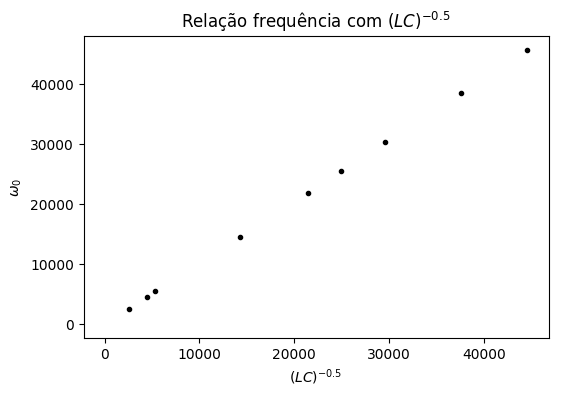

In [25]:
data4_ress = np.loadtxt("data/tarefa4-ress.dat").T

R4ress = 98.7
L = data4_ress[0]
C = data4_ress[1]
f = data4_ress[2]
w = 2*np.pi*f
w_teo = 1/np.sqrt(L*C)

plt.figure(dpi=100)
plt.title("Relação frequência com $(LC)^{-0.5}$")
plt.xlabel(r"$(LC)^{-0.5}$")
plt.ylabel(r"$\omega_0$")
plt.plot(data4_ress[0], data4_ress[1], color="red") #excluir
plt.plot(w_teo, w, ".k")
plt.show()

### Tarefa 5
Para quatro diferentes resistências encontrar quais as frequências nas quais a impedância é o dobro do valor no pico.
* Aproveitar experimento da tarefa 2
* Anotar resultados em data/tarefa5.dat

Text(0.5,1,'Fator de qualidade (C = 108.8 nF, L = 45.3 mH)')

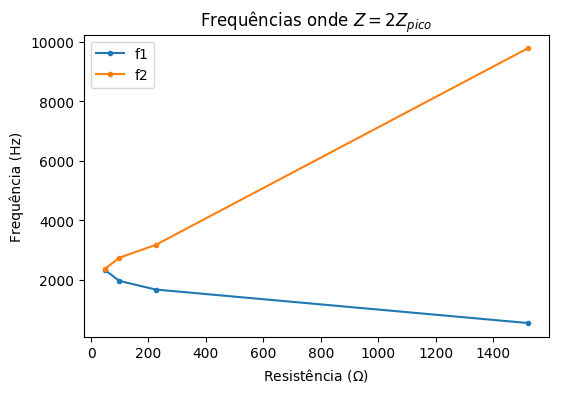

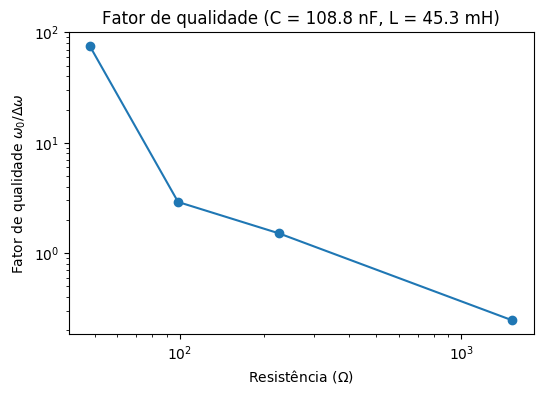

In [34]:
L5 = 45.3e-3
C5 = 108.8e-9
data5 = np.loadtxt('data/tarefa5.dat').T
R5 = data5[0]
escV0,quadV0 = data5[1],data5[2]
escVr,quadVr = data5[3],data5[4]
f1,f2 = data5[5],data5[6]
V0 = escV0*quadV0
Vr = escVr*quadVr
I5 = Vr/R5
Z5 = V0/I5

dw = (f2-f1)*2*np.pi
w0 = 1/np.sqrt(L5*C5)
Q = w0/dw

plt.figure(dpi=100)
plt.plot(R5,f1,'.-',label='f1')
plt.plot(R5,f2,'.-',label='f2')
plt.legend()
plt.xlabel('Resistência ($\\Omega$)')
plt.ylabel('Frequência (Hz)')
plt.title('Frequências onde $Z = 2 Z_{pico}$')

plt.figure(dpi=100)
plt.loglog(R5,Q,'-o')
plt.ylabel(r'Fator de qualidade $\omega_0/\Delta\omega$')
plt.xlabel('Resistência ($\\Omega$)')
plt.title('Fator de qualidade (C = 108.8 nF, L = 45.3 mH)')


## Análise transiente
Montar um circuito RLC com os seguintes componentes:

In [49]:
R2 = lambda x: x*1000 #potenciometro, x de 0 a 1
C2 = 0.1088e-6 #F
L2 = 14.8e-3 #H
f2 = 1/(2*np.pi*np.sqrt(L2*C2)) #Hz

### Tarefa 6
Verificar qualitativamente os três regimes de amortecimento variando a resistência
* Atingir resistencia menor;
* Igual; e
* Maior que a resistencia critica
* Tirar fotos :3

In [50]:
R_critico = 2*np.sqrt(L2/C2)
print("\nFrequência critica:")
print(R_critico, "ohm")


Frequência critica:
737.6433061167326 ohm


### Tarefa 7
Regime subamortecido: Medir frequência de ressonância e constante de amortecimento.
* Deixe na menor resistência possível o potenciometro
* Medir frequência de oscilação como na tarefa 2
* Medir constante de amortecimento pelo osciloscópio

Text(0.5,1,'Oscilação amortecida')

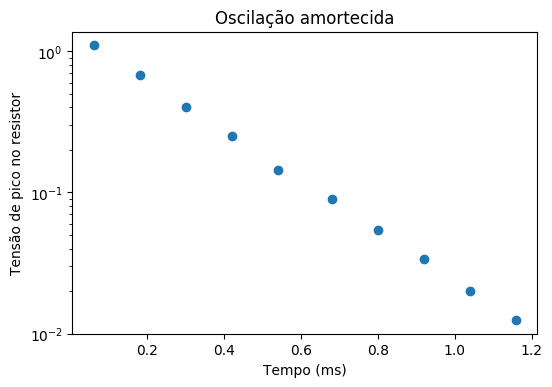

In [36]:
data7_2 = np.loadtxt("data/tarefa7-2.dat").T

escVr,quadVr = data7_2[0],data7_2[1]
esct,quadt   = data7_2[2],data7_2[3]
V7 = escVr*quadVr
t7 = esct*quadt

#T = data7_2[0]/data7_2[1]
#w = 2*np.pi/T
#gamma = np.sqrt( (f2/(2*np.pi))**2 - w**2 )
#print("\nConstante de amortecimento: ")
#print(gamma, "rad")

plt.figure(dpi=100)
plt.semilogy(1e3*t7,V7,'o')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão de pico no resistor')
plt.title('Oscilação amortecida')

### Tarefa 8
Analisar as correntes dos dois circuitos no osciloscópio e analisar qualitativamente.

Fotos.